In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('deliveries.csv')

In [6]:
print(df.head())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [7]:
print(df.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [9]:
print(df.describe())

           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000

In [10]:
print(df.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [13]:
# Task 1

In [11]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).head(10)
top_batsmen

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


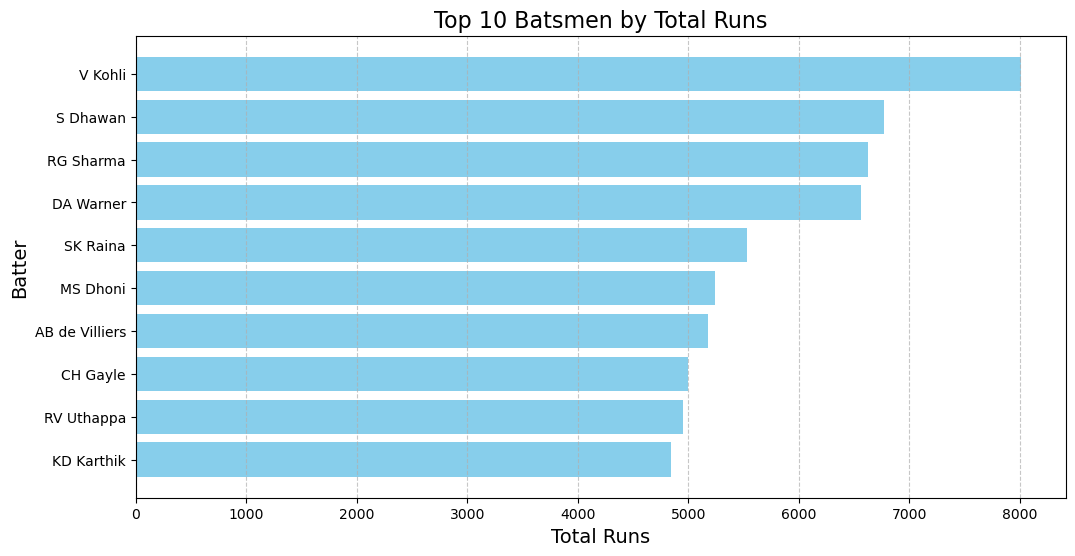

In [13]:
plt.figure(figsize=(12, 6))
plt.barh(top_batsmen['batter'], top_batsmen['batsman_runs'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Batsmen by Total Runs', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Batter', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Task 2

In [14]:
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets_df = df[df['dismissal_kind'].isin(valid_dismissals)]
top_bowlers = wickets_df.groupby('bowler').size().reset_index(name='wickets')
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)
top_bowlers

,bowler,wickets
445,YS Chahal,205
297,PP Chawla,192
102,DJ Bravo,183
61,B Kumar,181
379,SP Narine,180
304,R Ashwin,180
7,A Mishra,174
372,SL Malinga,170
168,JJ Bumrah,168
319,RA Jadeja,160


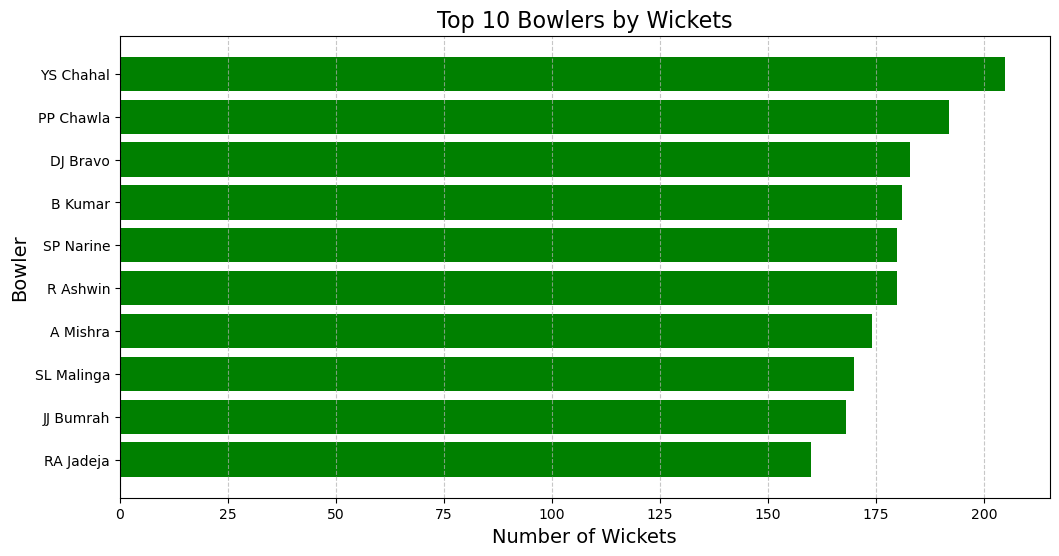

In [18]:
plt.figure(figsize=(12, 6))
plt.barh(top_bowlers['bowler'], top_bowlers['wickets'], color='green')
plt.gca().invert_yaxis()  
plt.title('Top 10 Bowlers by Wickets', fontsize=16)
plt.xlabel('Number of Wickets', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
 # Task 3

In [19]:
runs_by_over = df.groupby('over')['total_runs'].sum().reset_index()
print(runs_by_over)

    over  total_runs
0      0       13651
1      1       16163
2      2       17895
3      3       18415
4      4       18565
5      5       18528
6      6       14839
7      7       15981
8      8       16639
9      9       16353
10    10       16779
11    11       17076
12    12       17205
13    13       17634
14    14       18149
15    15       18472
16    16       19012
17    17       19559
18    18       19076
19    19       17765


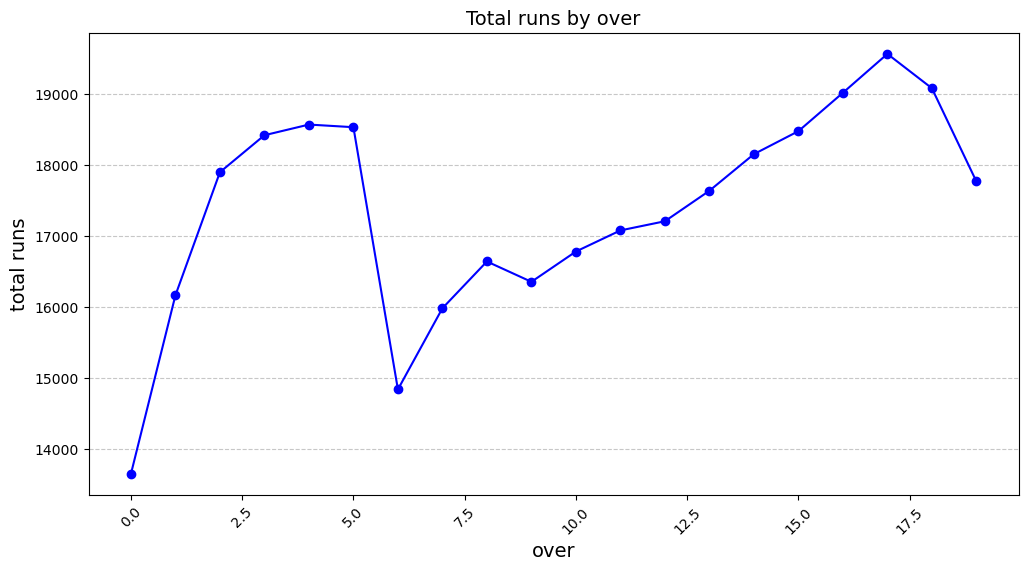

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(runs_by_over['over'], runs_by_over['total_runs'], marker='o', linestyle='-', color='blue')
plt.title('Total runs by over',fontsize=14)
plt.xlabel('over', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Task 4

In [23]:
extras_breakdown = df[df['extra_runs'] > 0].groupby('extras_type').size().reset_index(name='count')
print(extras_breakdown)

  extras_type  count
0        byes    673
1     legbyes   4001
2     noballs   1069
3     penalty      2
4       wides   8380


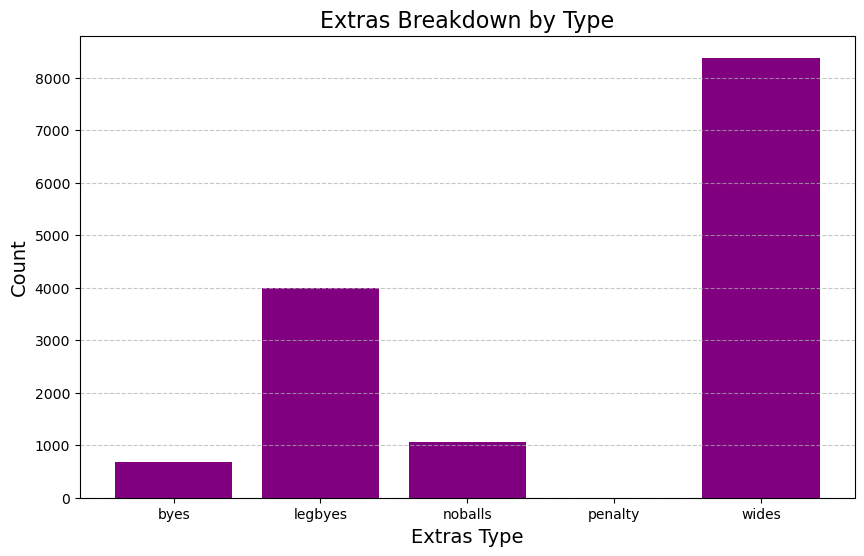

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(extras_breakdown['extras_type'], extras_breakdown['count'], color='purple')
plt.title('Extras Breakdown by Type', fontsize=16)
plt.xlabel('Extras Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Task 5

In [27]:
dismissals = df['dismissal_kind'].value_counts().reset_index()
dismissals.columns = ['dismissal_type', 'count']
dismissals

,dismissal_type,count
0,caught,8063
1,bowled,2212
2,run out,1114
3,lbw,800
4,caught and bowled,367
5,stumped,358
6,retired hurt,15
7,hit wicket,15
8,obstructing the field,3
9,retired out,3


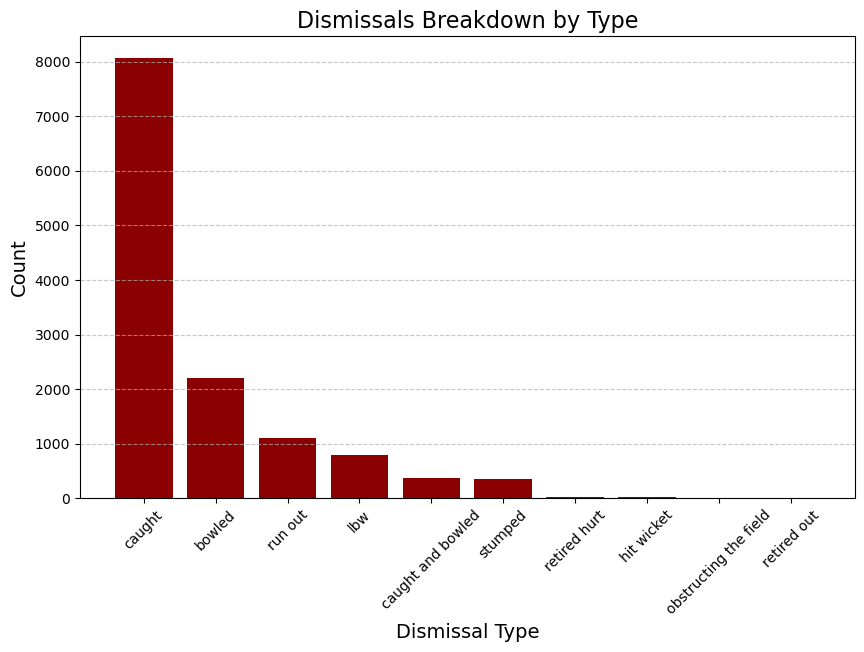

In [29]:
# plt.figure(figsize=(8, 8))
# plt.pie(dismissals['count'], labels=dismissals['dismissal_type'], autopct='%1.1f%%', startangle=140)
# plt.title('Dismissals Breakdown by Type', fontsize=16)
# plt.show()
plt.figure(figsize=(10, 6))
plt.bar(dismissals['dismissal_type'], dismissals['count'], color='darkred')
plt.title('Dismissals Breakdown by Type', fontsize=16)
plt.xlabel('Dismissal Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Task 6

In [30]:
team_performance = df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
print(team_performance.head(10))

   match_id                 batting_team  total_runs
0    335982        Kolkata Knight Riders         222
1    335982  Royal Challengers Bangalore          82
2    335983          Chennai Super Kings         240
3    335983              Kings XI Punjab         207
4    335984             Delhi Daredevils         132
5    335984             Rajasthan Royals         129
6    335985               Mumbai Indians         165
7    335985  Royal Challengers Bangalore         166
8    335986              Deccan Chargers         110
9    335986        Kolkata Knight Riders         112


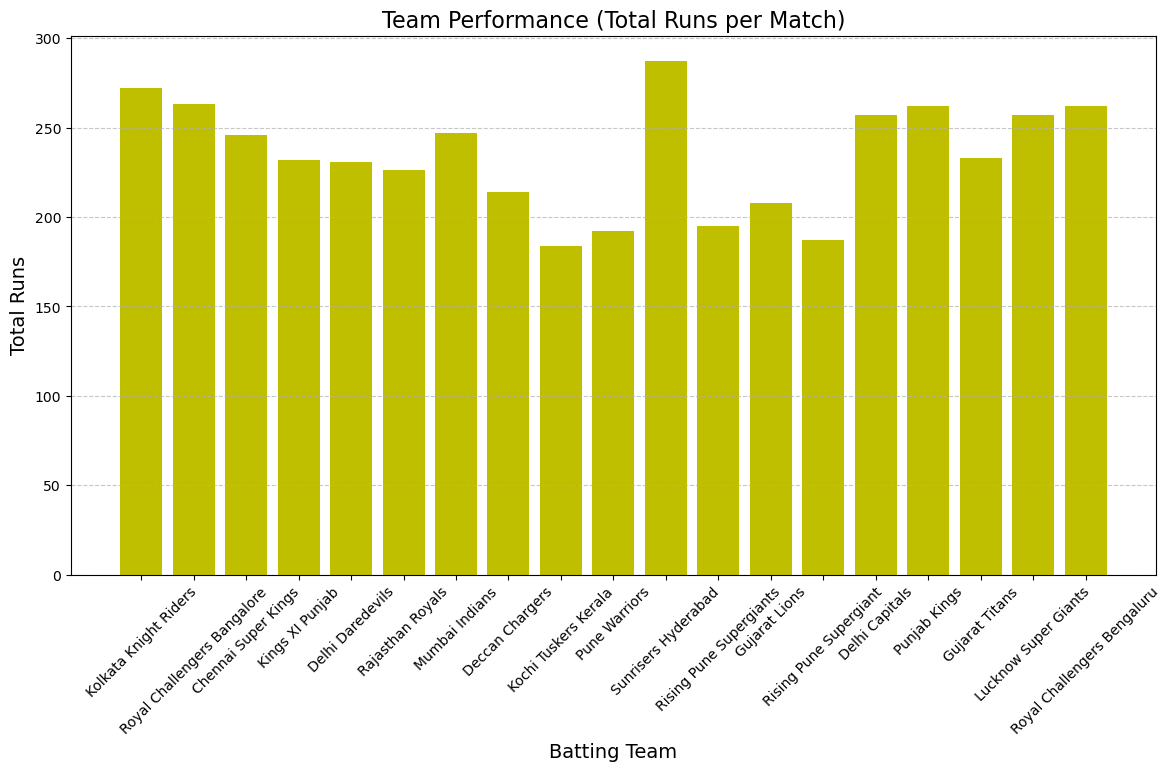

In [36]:
plt.figure(figsize=(14, 7))
plt.bar(team_performance['batting_team'], team_performance['total_runs'], color='y')
plt.title('Team Performance (Total Runs per Match)', fontsize=16)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
# Task 7

In [37]:
matches=pd.read_csv('matches.csv')
print(matches.columns)
print(df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [38]:
merged_data = pd.merge(df, matches[['id', 'toss_winner', 'winner']], left_on='match_id', right_on='id', how='inner')

In [41]:
toss_wins = merged_data[merged_data['toss_winner'] == merged_data['winner']].shape[0]
total_matches = merged_data['match_id'].nunique()
toss_win_percentage = (toss_wins / total_matches) * 100

In [42]:
print(toss_win_percentage)

11993.972602739726


In [ ]:
#Task 1.Average Run Rate per 

In [43]:
average_run_rate = df.groupby('over')['total_runs'].mean().reset_index()
print(average_run_rate)

    over  total_runs
0      0    0.981663
1      1    1.173528
2      2    1.316099
3      3    1.356538
4      4    1.369100
5      5    1.373055
6      6    1.103107
7      7    1.189948
8      8    1.242087
9      9    1.224577
10    10    1.262623
11    11    1.287686
12    12    1.301240
13    13    1.343645
14    14    1.393504
15    15    1.434273
16    16    1.498778
17    17    1.587839
18    18    1.646896
19    19    1.776855


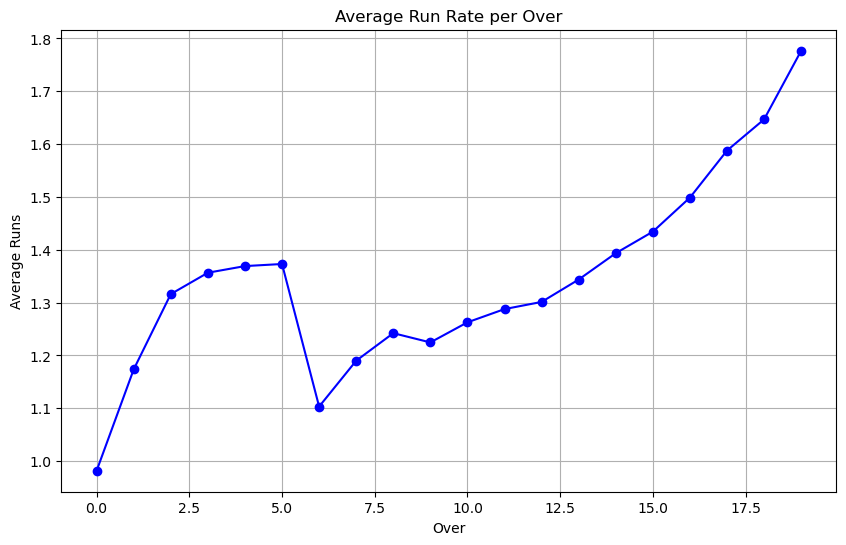

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(average_run_rate['over'], average_run_rate['total_runs'], marker='o', linestyle='-', color='b')
plt.title('Average Run Rate per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.grid(True)
plt.show()

In [ ]:
# Task 2.Wicket Fall Distribution by Over

In [23]:
wicket_data = df[df['is_wicket'] == 1]

In [25]:
wickets_per_over = wicket_data.groupby('over').size().reset_index(name='wicket_count')
print(wickets_per_over)

    over  wicket_count
0      0           463
1      1           503
2      2           533
3      3           548
4      4           576
5      5           540
6      6           444
7      7           472
8      8           537
9      9           498
10    10           568
11    11           567
12    12           585
13    13           633
14    14           695
15    15           736
16    16           779
17    17           976
18    18           989
19    19          1308


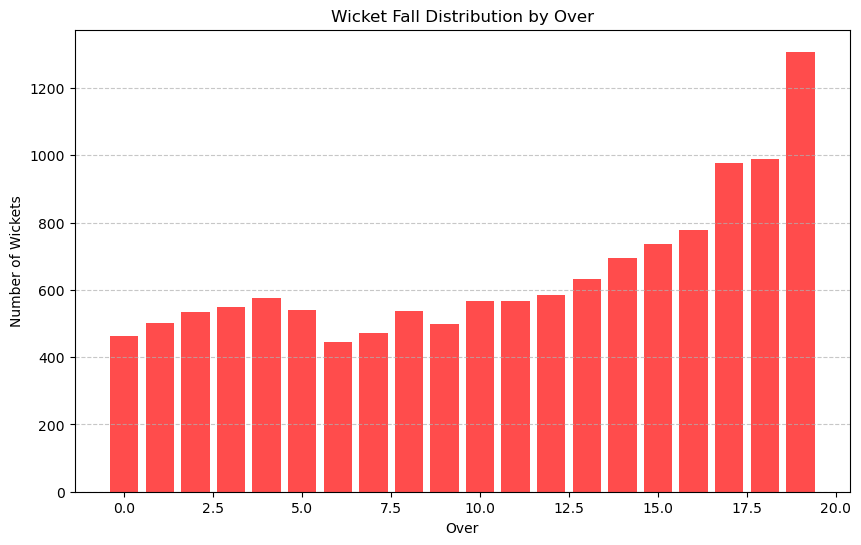

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(wickets_per_over['over'], wickets_per_over['wicket_count'], color='r', alpha=0.7)
plt.title('Wicket Fall Distribution by Over')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Task 3.Partnership Analysis (Top 10 Partnerships by Total Runs)

In [46]:
partnerships = df.groupby(['batter', 'non_striker'])['total_runs'].sum().reset_index()
top_partnerships = partnerships.nlargest(10, 'total_runs')
print(top_partnerships)

              batter     non_striker  total_runs
324   AB de Villiers         V Kohli        1623
1477        CH Gayle         V Kohli        1617
8499         V Kohli  AB de Villiers        1511
1795       DA Warner        S Dhawan        1420
8509         V Kohli        CH Gayle        1185
6798      RV Uthappa       G Gambhir        1077
8519         V Kohli    F du Plessis        1050
2918    Ishan Kishan       RG Sharma         992
2361    F du Plessis         V Kohli         982
6995        S Dhawan       DA Warner         937


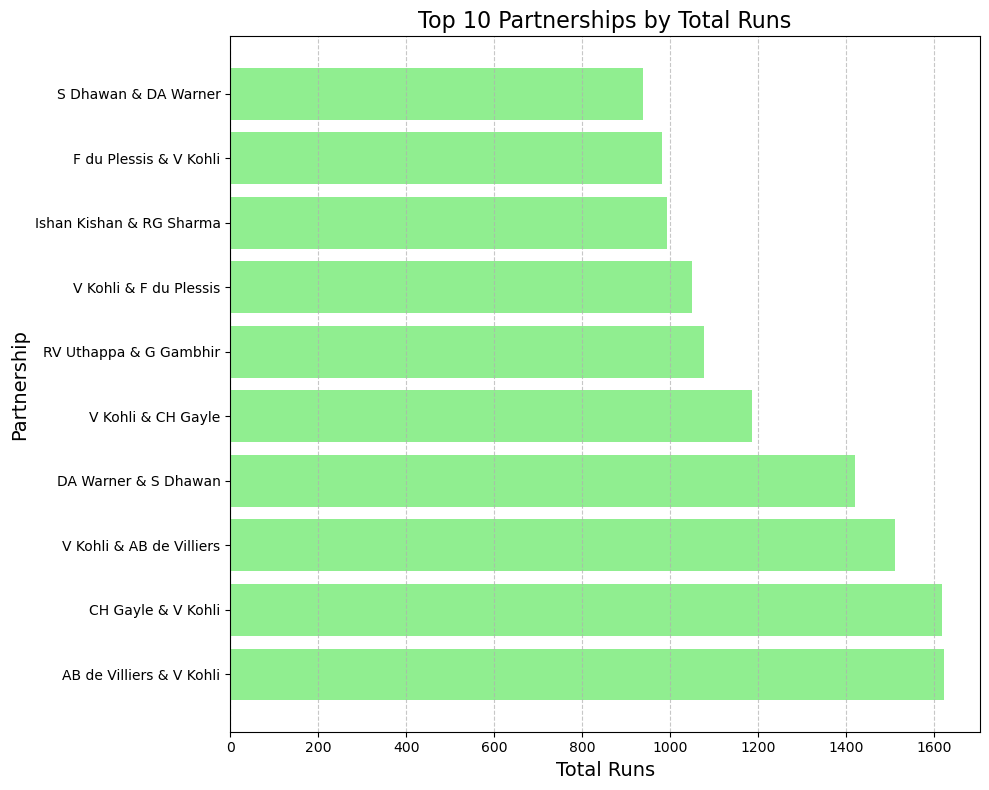

In [55]:
plt.figure(figsize=(10, 8))
plt.barh(top_partnerships['partnership'], top_partnerships['total_runs'], color='lightgreen')
plt.title('Top 10 Partnerships by Total Runs', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Partnership', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Task 4.Batsman vs Bowler Analysis

In [56]:
batsman_bowler_runs = df.groupby(['batter', 'bowler'])['batsman_runs'].sum().reset_index()
top_batsman_bowler = batsman_bowler_runs.sort_values(by='batsman_runs', ascending=False).head(10)
print(top_batsman_bowler)

          batter     bowler  batsman_runs
5481   DA Warner  SP Narine           195
26199    V Kohli   R Ashwin           179
22509   SK Raina  PP Chawla           175
19809  RG Sharma   UT Yadav           170
26260    V Kohli   UT Yadav           168
26003    V Kohli   A Mishra           162
11627   KL Rahul  DL Chahar           158
26062    V Kohli   DJ Bravo           157
26208    V Kohli  RA Jadeja           157
5515   DA Warner  YS Chahal           156


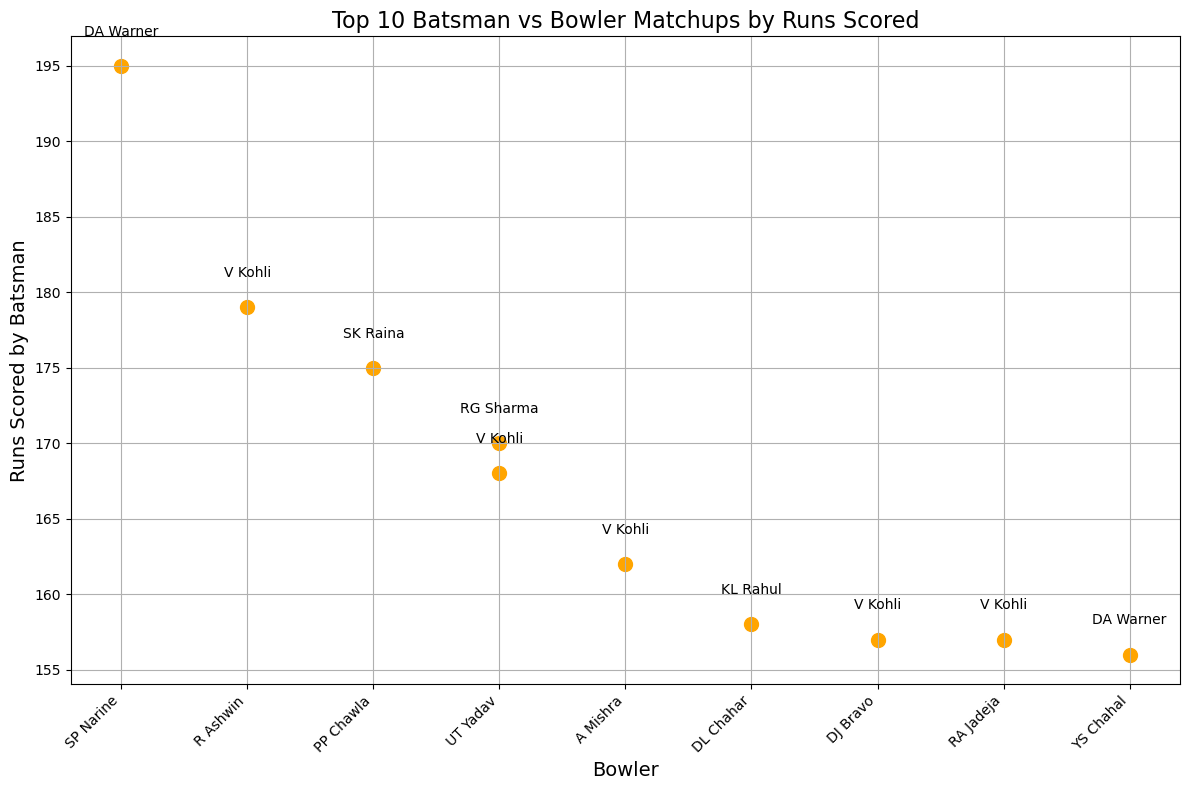

In [59]:
plt.figure(figsize=(12, 8))
plt.scatter(top_batsman_bowler['bowler'], top_batsman_bowler['batsman_runs'], color='orange', s=100)
plt.title('Top 10 Batsman vs Bowler Matchups by Runs Scored', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Runs Scored by Batsman', fontsize=14)
plt.xticks(rotation=45, ha='right')
for x, y, label in zip(top_batsman_bowler['bowler'], top_batsman_bowler['batsman_runs'], top_batsman_bowler['batter']):
    plt.text(x, y + 2, label, ha='center', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
#Task 5.Wickets by Dismissal Kind per Bowler

In [60]:
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets_df = df[df['dismissal_kind'].isin(valid_dismissals)]
dismissals_by_bowler = wickets_df.groupby(['bowler', 'dismissal_kind']).size().reset_index(name='wickets')
top_dismissals = dismissals_by_bowler.sort_values(by='wickets', ascending=False).head(10)
print(top_dismissals)

         bowler dismissal_kind  wickets
265    DJ Bravo         caught      143
1222  YS Chahal         caught      127
165     B Kumar         caught      122
839    R Ashwin         caught      117
1155   UT Yadav         caught      108
455   JJ Bumrah         caught      108
358    HV Patel         caught      107
19     A Mishra         caught      102
689   MM Sharma         caught      102
504    K Rabada         caught       97


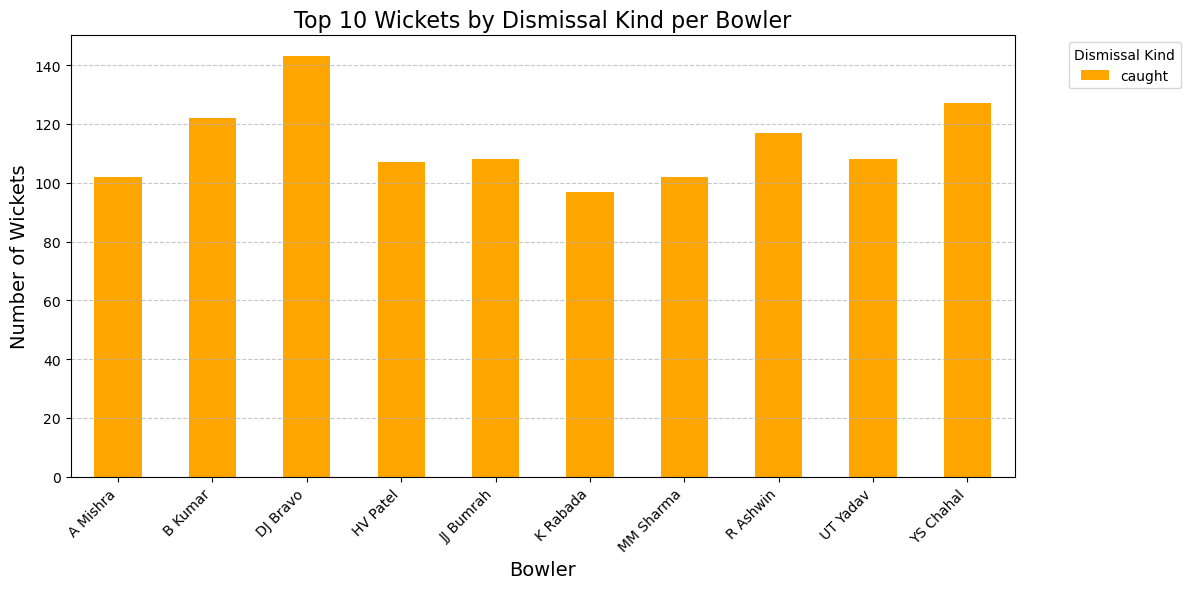

In [63]:
stacked_data = top_dismissals.pivot(index='bowler', columns='dismissal_kind', values='wickets').fillna(0)
plt.figure(figsize=(12, 6))
stacked_data.plot(kind='bar', stacked=True, color=['orange', 'cyan'], ax=plt.gca())
plt.title('Top 10 Wickets by Dismissal Kind per Bowler', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Number of Wickets', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dismissal Kind', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Task 6.Extras Conceded per Bowling Team

In [64]:
extras_conceded = df.groupby('bowling_team')['extra_runs'].sum().reset_index()
extras_conceded = extras_conceded.sort_values(by='extra_runs', ascending=False)
print(extras_conceded)

                   bowling_team  extra_runs
10               Mumbai Indians        2295
16  Royal Challengers Bangalore        2040
8         Kolkata Knight Riders        1957
13             Rajasthan Royals        1917
0           Chennai Super Kings        1842
6               Kings XI Punjab        1571
3              Delhi Daredevils        1268
18          Sunrisers Hyderabad        1254
2                Delhi Capitals         725
1               Deccan Chargers         659
12                 Punjab Kings         480
9          Lucknow Super Giants         386
11                Pune Warriors         335
5                Gujarat Titans         295
4                 Gujarat Lions         188
17  Royal Challengers Bengaluru         151
14       Rising Pune Supergiant         111
7          Kochi Tuskers Kerala         110
15      Rising Pune Supergiants         108


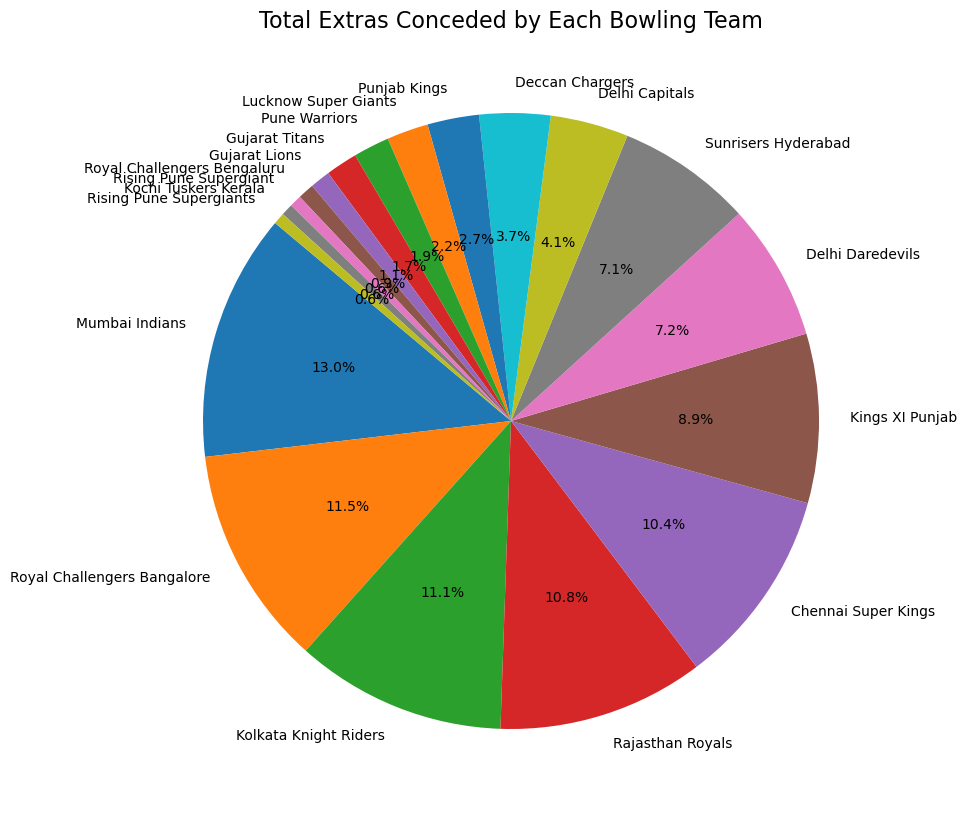

In [65]:
plt.figure(figsize=(10, 10))
plt.pie(extras_conceded['extra_runs'], labels=extras_conceded['bowling_team'], 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Total Extras Conceded by Each Bowling Team', fontsize=16)
plt.show()